In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('./data/raw/Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.shape, df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


((7043, 21), None)

In [8]:
print("Unique values count:")
for col in df.columns:
    count = df[col].unique()
    print(f"'{col}': {count}")

Unique values count:
'customerID': ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
'gender': ['Female' 'Male']
'SeniorCitizen': [0 1]
'Partner': ['Yes' 'No']
'Dependents': ['No' 'Yes']
'tenure': [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
'PhoneService': ['No' 'Yes']
'MultipleLines': ['No phone service' 'No' 'Yes']
'InternetService': ['DSL' 'Fiber optic' 'No']
'OnlineSecurity': ['No' 'Yes' 'No internet service']
'OnlineBackup': ['Yes' 'No' 'No internet service']
'DeviceProtection': ['No' 'Yes' 'No internet service']
'TechSupport': ['No' 'Yes' 'No internet service']
'StreamingTV': ['No' 'Yes' 'No internet service']
'StreamingMovies': ['No' 'Yes' 'No internet service']
'Contract': ['Month-to-month' 'One year' 'Two year']
'PaperlessBilling': ['Yes' 'No']
'PaymentMethod': ['El

In [9]:
print("Unique values count:")
for col in df.columns:
    count = df[col].nunique()
    print(f"'{col}': {count}")

Unique values count:
'customerID': 7043
'gender': 2
'SeniorCitizen': 2
'Partner': 2
'Dependents': 2
'tenure': 73
'PhoneService': 2
'MultipleLines': 3
'InternetService': 3
'OnlineSecurity': 3
'OnlineBackup': 3
'DeviceProtection': 3
'TechSupport': 3
'StreamingTV': 3
'StreamingMovies': 3
'Contract': 3
'PaperlessBilling': 2
'PaymentMethod': 4
'MonthlyCharges': 1585
'TotalCharges': 6531
'Churn': 2


In [10]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [12]:
num_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Check for non-numeric values in each column
for col in num_columns:
    non_numeric = df[col].apply(lambda x: not str(x).replace('.', '', 1).isdigit() if pd.notna(x) else False)
    if non_numeric.any():
        print(f"\nNon-numeric values found in {col}:")
        print(df[col][non_numeric].unique())


Non-numeric values found in TotalCharges:
[' ']


In [13]:
# Convert non-numeric values to NaN
for col in numerical_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

In [14]:
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No



tenure Statistics:
Mean: 32.37
Median: 29.00
Std: 24.56
Min: 0.00
Max: 72.00

MonthlyCharges Statistics:
Mean: 64.76
Median: 70.35
Std: 30.09
Min: 18.25
Max: 118.75

TotalCharges Statistics:
Mean: 2283.30
Median: 1397.47
Std: 2266.77
Min: 18.80
Max: 8684.80


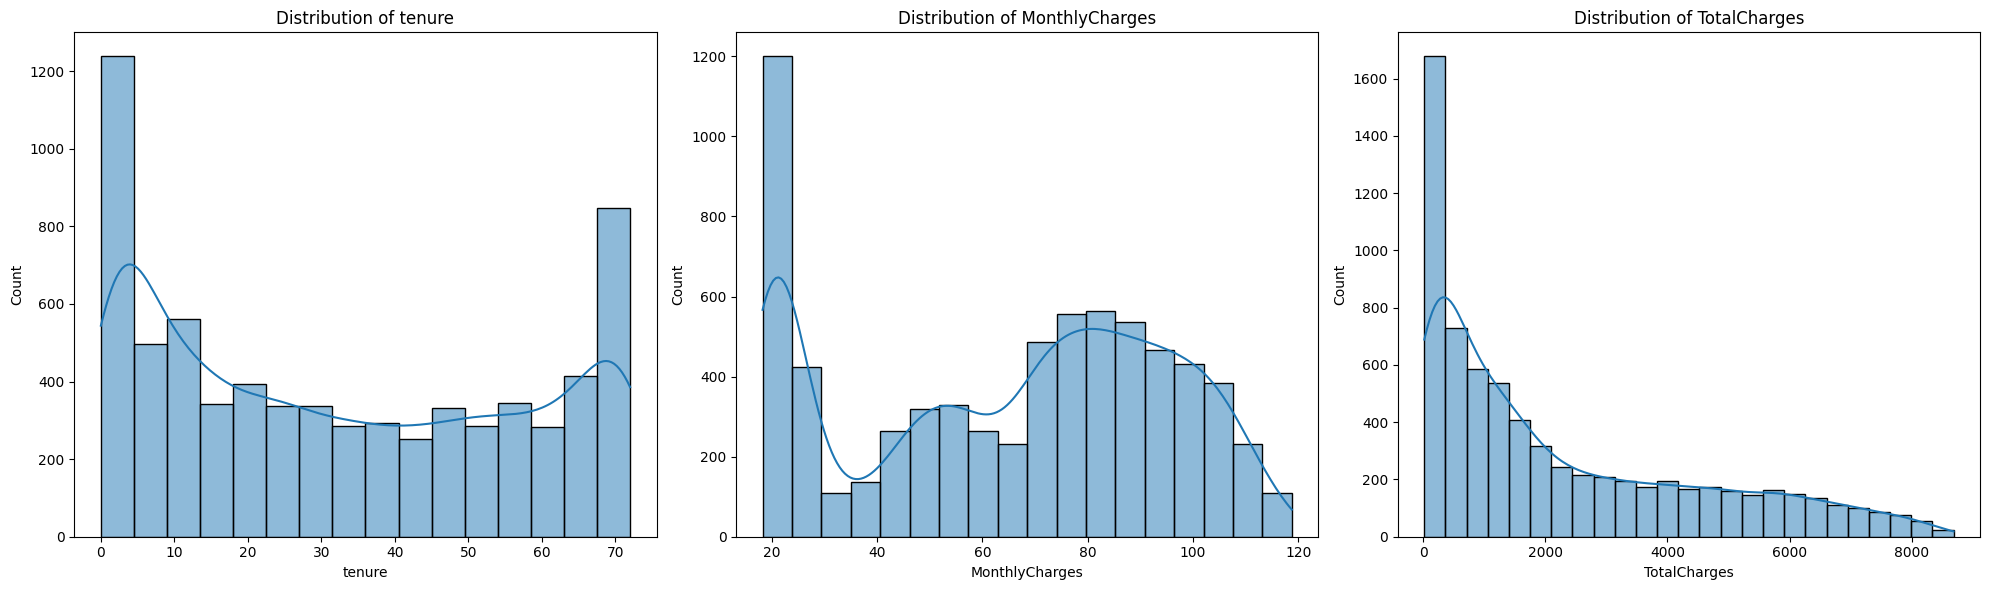

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, col in enumerate(numerical_columns):
    # Histogram with KDE
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    
    # Print statistics
    print(f"\n{col} Statistics:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")

plt.tight_layout()
plt.show()

In [16]:
def find_anomaly(data):
    mean = data.mean()
    std = data.std()

    upper_bound = mean + (3 * std)
    lower_bound = mean - (3 * std)

    return (data < lower_bound) | (data > upper_bound)

for col in numerical_columns:
    n_outliers = find_anomaly(df[col]).sum()
    n_outliers_percentage = round((n_outliers / len(df)), 3)
    
    print(f'{col} : outliers {n_outliers}, {n_outliers_percentage}%')

tenure : outliers 0, 0.0%
MonthlyCharges : outliers 0, 0.0%
TotalCharges : outliers 0, 0.0%


In [17]:
df = df.drop(columns=['customerID'])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [18]:
df.duplicated().sum()

np.int64(22)

In [19]:
df = df.drop_duplicates()

In [20]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [21]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)

In [22]:
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
                       'MultipleLines', 'InternetService', 'OnlineSecurity',
                       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
                       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
internet_service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

In [24]:
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')

for col in internet_service_cols:
    df[col] = df[col].replace('No internet service', 'No')

In [25]:
# Create Add-ons column by counting 'Yes' values in internet service columns
df['Add-ons'] = df[internet_service_cols].apply(lambda row: (row == 'Yes').sum(), axis=1)

In [26]:
def custom_binning_tenure(tenure):
    if tenure <= 24:
        return 'New'
    elif tenure <= 48:
        return 'Established'
    else:
        return 'Loyal'
        
df['TenureGroup'] = df['tenure'].apply(custom_binning_tenure)

In [27]:
# Drop internet service columns and tenure column
columns_to_drop = internet_service_cols + ['tenure']
df = df.drop(columns=columns_to_drop)

In [28]:
df_encoded = df.copy()

In [29]:
encode_dict_tenure ={
    'New' : 0,
    'Established' : 1,
    'Loyal' : 2
}

df_encoded['TenureGroup'] = df_encoded['TenureGroup'].map(encode_dict_tenure)

In [30]:
encode_dict_contract ={
    'Month-to-month' : 0,
    'One year' : 1,
    'Two year' : 2
}

df_encoded['Contract'] = df_encoded['Contract'].map(encode_dict_contract)

In [31]:
encode_dict_internet_services ={
    'No' : 0,
    'DSL' : 1,
    'Fiber optic' : 2
}

df_encoded['InternetService'] = df_encoded['InternetService'].map(encode_dict_internet_services)

In [32]:
nominal_features = ['gender', 'PaymentMethod']
columns_to_be_binary = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'PaperlessBilling', 'Churn']

In [33]:
df_encoded = pd.get_dummies(df_encoded, columns=nominal_features, drop_first=False, dtype=int)

In [34]:
# Convert binary Yes/No columns to 1/0
for col in columns_to_be_binary:
    df_encoded[col] = df_encoded[col].map({'Yes': 1, 'No': 0})

In [35]:
df_encoded.isnull().sum()

SeniorCitizen                              0
Partner                                    0
Dependents                                 0
PhoneService                               0
MultipleLines                              0
InternetService                            0
Contract                                   0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Add-ons                                    0
TenureGroup                                0
gender_Female                              0
gender_Male                                0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMethod_Electronic check             0
PaymentMethod_Mailed check                 0
dtype: int64

In [36]:
columns_need_to_be_scaled = ['MonthlyCharges', 'TotalCharges']

for col in columns_need_to_be_scaled:
    scaler = StandardScaler()
    df_encoded[col] = scaler.fit_transform(df_encoded[[col]])

In [37]:
df_encoded.head(15)

,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,Add-ons,TenureGroup,gender_Female,gender_Male,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,0,0,1,0,1,-1.164135,-0.995686,0,1,0,1,0,0,0,1,0
1,0,0,0,1,0,1,1,0,-0.262811,-0.175262,0,2,1,0,1,0,0,0,1
2,0,0,0,1,0,1,0,1,-0.365914,-0.961142,1,2,0,0,1,0,0,0,1
3,0,0,0,0,0,1,1,0,-0.750058,-0.196769,0,3,1,0,1,1,0,0,0
4,0,0,0,1,0,2,0,1,0.194503,-0.941951,1,0,0,1,0,0,0,1,0
5,0,0,0,1,1,2,0,1,1.157358,-0.646874,1,3,0,1,0,0,0,1,0
6,0,0,1,1,1,2,0,1,0.806473,-0.148836,0,2,0,0,1,0,1,0,0
7,0,0,0,0,0,1,0,0,-1.167461,-0.875665,0,1,0,1,0,0,0,0,1
8,0,1,0,1,1,2,0,1,1.328642,0.334975,1,4,1,1,0,0,0,1,0
9,0,0,1,1,0,1,1,0,-0.289418,0.529928,0,2,2,0,1,1,0,0,0


In [38]:
print("Unique values count:")
for col in df_encoded.columns:
    count = df_encoded[col].unique()
    print(f"'{col}': {count}")

Unique values count:
'SeniorCitizen': [0 1]
'Partner': [1 0]
'Dependents': [0 1]
'PhoneService': [0 1]
'MultipleLines': [0 1]
'InternetService': [1 2 0]
'Contract': [0 1 2]
'PaperlessBilling': [1 0]
'MonthlyCharges': [-1.16413536 -0.26281076 -0.36591432 ... -0.05826662 -0.68686569
  0.46057706]
'TotalCharges': [-0.99568597 -0.1752619  -0.96114226 ... -0.85601116 -0.87359183
  2.01074152]
'Churn': [0 1]
'Add-ons': [1 2 3 0 4 5 6]
'TenureGroup': [0 1 2]
'gender_Female': [1 0]
'gender_Male': [0 1]
'PaymentMethod_Bank transfer (automatic)': [0 1]
'PaymentMethod_Credit card (automatic)': [0 1]
'PaymentMethod_Electronic check': [1 0]
'PaymentMethod_Mailed check': [0 1]


In [39]:
df_scaled = df_encoded.copy()
X = df_scaled.drop(columns=['Churn'])
y = df_scaled['Churn']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5616, 18), (5616,), (1405, 18), (1405,))

In [41]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

X_train_resampled.shape, y_train_resampled.shape, X_test.shape, y_test.shape

((8222, 18), (8222,), (1405, 18), (1405,))

In [42]:
np.savez('./artifacts/X_train.npz', X_train_resampled)
np.savez('./artifacts/y_train.npz', y_train_resampled)
np.savez('./artifacts/X_test.npz', X_test)
np.savez('./artifacts/y_test.npz', y_test)